* Authors: Andrea Jiménez Zuñiga e Isabel Afán de Ribera
* Date: 04/12/2020
* Institution: CUNEF

# 04. Support Vector Machine (SVM)

To validate our model is necessary to split the data set in a training and test set. To do this, the data is randomly divided by applying 80% of the observations to training and the remaining 20% to test.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
import itertools
import pickle
from sklearn import metrics  



* __Reading the Data File__ 

In [2]:
data_path = './data/Engineering_loans_final.csv'
loans = pd.read_csv(data_path)
loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,pub_rec_bankruptcies,funded_amnt_inv,funded_amnt,total_pymnt,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
0,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,...,2.147209,-0.358375,-0.358869,-0.269064,1.0,2.0,1.0,0.0,3.0,0.0
1,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,...,-0.371165,-0.871593,-0.871890,-0.722452,1.0,3.0,2.0,4.0,22.0,1.0
2,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,...,-0.371165,-0.836401,-0.836712,-0.678555,1.0,1.0,2.0,0.0,3.0,0.0
3,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,...,4.665582,-0.543133,-0.543557,-0.438391,1.0,3.0,2.0,2.0,14.0,1.0
4,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,...,-0.371165,-0.073905,-0.074509,-0.000405,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,...,-0.371165,-0.358375,-0.358869,-0.040532,1.0,3.0,1.0,3.0,15.0,2.0
462187,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,...,-0.371165,-0.308519,-0.309033,-0.928097,0.0,1.0,1.0,1.0,9.0,2.0
462188,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,...,2.147209,-0.191212,-0.191771,-0.832939,0.0,3.0,2.0,3.0,16.0,2.0
462189,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,...,-0.371165,-0.308519,-0.309033,-0.907729,0.0,3.0,2.0,4.0,22.0,1.0


In [3]:
#loans = loans.iloc[:,1:500]
#loans.head()

* __Splitting the data into train and test set__

In [4]:
X = loans.drop(['loan_status'], axis = 1).values
y = loans['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

* __Fitting the model and Prediction__

In [5]:
%%time
SVM = SVC(max_iter = 1000)
SVM.fit(X_train,y_train)




CPU times: user 47.7 s, sys: 794 ms, total: 48.5 s
Wall time: 49.9 s


/Users/Andy/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=1000)

Next, we make the predictions using the subset above, which is the test set.

In [7]:
prediction = SVM.predict(X_test)
print(prediction)

[1. 1. 1. ... 1. 1. 1.]


* __Accuracy__

In [8]:
accuracy_score(y_test, prediction)

0.8016854358009066

In this case we can see that the hits were 80%.

## Model Evaluation

* __Confussion Matrix__

In order to be able to illustrate the confusion matrix, a function called plot_confusion_matrix has been defined, indicating the parameters to be taken into account.

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We proceed to graph the confussion matrix:

Confusion matrix, without normalization
[[14441  8995]
 [ 9337 59666]]


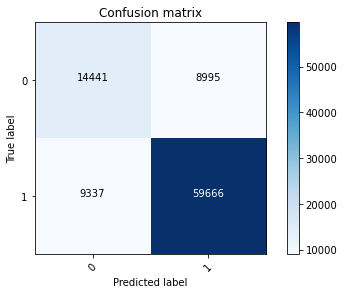

In [10]:
cnf_matrix = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [11]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  14441
False Positives:  8995
False Negatives:  9337
True Positives:  59666


With the confusion matrix we can see that there are 59.666 true positives in total, which means that those loans that have been classified as fully paid are correctly placed.

On the other hand, we can see that there are 14.441 true negatives in total, which means that those loans that have been classified as not paid are correctly placed.

It can be seen as well, that there is a total of 8.995 and 9.337 false positives and false negatives, respectively. This means that these loans have been misplaced.

* __Saving the model__ 

In [24]:
model = SVM
filename = 'svm_model.pkl'
pickle.dump(model,open(filename,'wb'))